### 저번시간에 한 형태소 분석기를 잘 설치했다면 아래와 같은 내용은 쉽게 확인할 수 있을겁니다.
### 클라우드에서는 어렵지 않으니, 해봐도 좋을 것 같아요ㅎㅎ
### 신기하게도 맞춤법 오류등에 따라 서로 다른 성능을 보이는 것을 확인할 수 있습니다!

In [1]:
from konlpy.tag import Mecab, Hannanum
hannanum = Hannanum()
mecab = Mecab()
text = '자연어처리가 너무재밌어서밥먹는것도가끔까먹어요'
print(mecab.morphs(text))
print(hannanum.morphs(text))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']
['자연어처리', '가', '너무재밌어서밥먹는것도가끔까먹어요']


### khaiii는 아래와 같이 만들어줘야 편하게 쓸 수 있어요!

In [2]:
from konlpy.tag import Hannanum,Kkma,Komoran,Mecab,Okt
import khaiii
import time

api = khaiii.KhaiiiApi()
api.open()

class Khaiii():
    def pos(self, phrase, flatten=True, join=False):
        """POS tagger.

        :param flatten: If False, preserves eojeols.
        :param join: If True, returns joined sets of morph and tag.

        """
        sentences = phrase.split('\n')
        morphemes = []
        if not sentences:
            return morphemes

        for sentence in sentences:
            for word in api.analyze(sentence):
                result = [(m.lex, m.tag) for m in word.morphs]
                if join:
                    result = ['{}/{}'.format(m.lex, m.tag) for m in word.morphs]

                morphemes.append(result)

        if flatten:
            return sum(morphemes, [])

        return morphemes

### 여러가지 형태소 분석기를 비교해 봅니다.

In [3]:
tokenizer_list = [Hannanum(),Kkma(),Komoran(),Mecab(),Okt(),Khaiii()]

kor_text = '하... 잘좀하자 잘좀. 코로나바이러스는 2019년 12월 중국 우한에서 처음 발생한 뒤 전 세계로 확산된, 새로운 유형의 호흡기 감염 질환입니다.'

for tokenizer in tokenizer_list:
    st = time.time()
    print('[{}] \n{}'.format(tokenizer.__class__.__name__, tokenizer.pos(text + kor_text)))
    print(time.time() - st)

[Hannanum] 
[('자연어처리', 'N'), ('가', 'J'), ('너무재밌어서밥먹는것도가끔까먹어요하', 'N'), ('...', 'S'), ('잘좀하', 'N'), ('이', 'J'), ('자', 'E'), ('잘좀', 'N'), ('.', 'S'), ('코로나바이러스', 'N'), ('는', 'J'), ('2019년', 'N'), ('12월', 'N'), ('중국', 'N'), ('우한', 'N'), ('에서', 'J'), ('처음', 'M'), ('발생', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('뒤', 'N'), ('전', 'N'), ('세계', 'N'), ('로', 'J'), ('확산', 'N'), ('되', 'X'), ('ㄴ', 'E'), (',', 'S'), ('새롭', 'P'), ('은', 'E'), ('유형', 'N'), ('의', 'J'), ('호흡기', 'N'), ('감염', 'N'), ('질환', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]
1.9873437881469727
[Kkma] 
[('자연어', 'NNG'), ('처리', 'NNG'), ('가', 'JKS'), ('너무', 'MAG'), ('재밌', 'VA'), ('어서', 'ECD'), ('밥', 'NNG'), ('먹', 'VV'), ('는', 'ETD'), ('것', 'NNB'), ('도', 'JX'), ('가끔', 'MAG'), ('까먹', 'VV'), ('어', 'ECD'), ('요하', 'NNG'), ('...', 'SE'), ('잘', 'MAG'), ('좀', 'MAG'), ('하', 'VV'), ('자', 'ECE'), ('잘', 'MAG'), ('좀', 'MAG'), ('.', 'SF'), ('코로나', 'NNG'), ('바', 'NNG'), ('이러', 'MAG'), ('슬', 'VV'), ('는', 'ETD'), ('2019', 'NR'), ('년', 'NNM'), ('12', 'NR'), ('월', 'N

### 저의 결론은 komoran과 mecab입니다. 이 두개를 써봐야겠어요.
### hannanom도 괜찮아 보였는데, 띄어쓰기에 약하네요ㅜㅜ

In [4]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

2021-12-10 11:39:22.166278: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-10 11:39:22.166383: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### [여기](https://github.com/jungyeul/korean-parallel-corpora)보시면 말뭉치가 많아요!
### 그중에 한국어 영어 번역을 학습시킬때 쓰는 말뭉치로 형태소 분석을 하겠습니다.
### (우리말만 할거에요ㅎㅎ)
```shell
# 데이터를 받을 폴더에서 아래 명령을 하시면 데이터가 받아집니다.
wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
tar -xzvf korean-english-park.train.tar.gz
```

In [5]:
import os
path_to_file = 'data/kor_en/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


### 이렇게 한국어 데이터를 받아왔어요.
### 데이터의 분포를 눈으로 봐볼게요!
### 최소길이 문장, 최대길이 문장, 문장 길이별 분포를 봐볼거에요.
### 잠시 후 그 강력함을 볼 수 있어요.

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


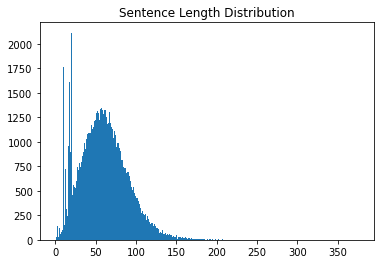

In [6]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

### 모든 자연스러운 데이터 분포는 정규분포를 따라요. 여기서 특정 문장길이만 특별히 높게나온건 매우 수상합니다!
### 해당 길이 문장을 출력해볼게요!

In [7]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


### 길이 1짜리 문장도 이상해서 시험삼아 출력해봤는데, 무의미한 문장입니다;;

In [8]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [9]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


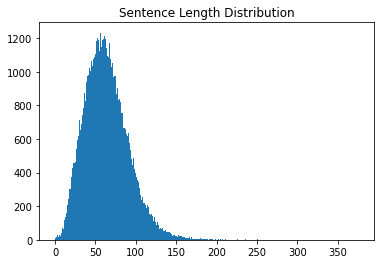

In [10]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

### 신기하게 중복데이터만 제거해주었을 뿐인데, 데이터가 정규분포에 가까워졌죠?
### 확률시간에 배우는 큰 수의 법칙과 일맥상통하는 현상입니다.
### 이제 저는 로컬에서 할 수 있게 문장길이 100개 까지만 볼거에요ㅋㅋ
### 사실 그렇게 하면 데이터는 거의다 보면서, 계산량은 매우 많이 줄일 수 있어요.

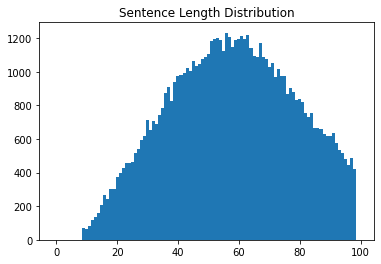

In [11]:
max_len = 100
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [12]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [13]:
split_tensor, split_tokenizer = tokenize(filtered_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 209340


### 그냥 띄어쓰기 기반으로 데이터를 정리하면 이렇게 20만단어나 제 모델이 학습해야해요.
### 그럼 1,2번 나온단어는 어차피 학습도 제대로 안될꺼고, 또 빼고 학습하자니, 분통이 터지네요ㅜㅜ
### 그러면 한번 형태소 단위로 잘라봅시다.

In [14]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 있다.
2 : 밝혔다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 전했다.
9 : 위해
10 : 지난
11 : 이번


In [16]:
mecab_corpus = []
for kor in filtered_corpus:
    # 코드를 작성하세요
    mecab_corpus.append(mecab.morphs(kor))
    # re.sub(r"[^0-9A-zㅏ-ㅣㄱ-ㅎ가-힣?!,.()]","",kor)
    # komoran_corpus.append(komoran.morphs(kor))


In [15]:
# 위에서 사용한 코드를 활용해 MeCab 단어 사전을 만들어보세요. 
# Hint : mecab.morphs()를 사용해서 형태소분석을 합니다.
from konlpy.tag import Komoran, Mecab
import re
mecab = Mecab()
komoran = Komoran()


komoran_corpus = []

for kor in filtered_corpus:
    # 코드를 작성하세요
    #mecab_corpus.append(mecab.morphs(kor))
    kor = re.sub(r"[^0-9A-zㅏ-ㅣㄱ-ㅎ가-힣?!,.()\s'\"]","",kor)
    komoran_corpus.append(komoran.morphs(kor))


### 위와같은 코드로 받는 이유는 komoran은 글자만 학습을 한 상태여서 그래요. 이모지 같은게 데이터에 섞여있어서, 오류가 나더라구요. mecab은 그냥 다 처리 하더라구요.

In [17]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
komoran_tensor, komoran_tokenizer = tokenize(komoran_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))
print("Komoran Vocab Size:", len(komoran_tokenizer.index_word))

MeCab Vocab Size: 47782
Komoran Vocab Size: 43944


### 확실히 단어수가 4-5배 가량 줄었네요.
### 이렇게 하면 학습도 효율적일 뿐만 아니라, 없던 단어까지 만들어낼 수 있습니다!
### 성능은 말할 것도 없구요.ㅎㅎ
### komoran이 단어를 더 효율적으로 잘 줄여준 모습을 볼 수 있습니다.
### 제가 여러차례 테스트해본 결과, mecab은 한글을 위해서 나온 건 아니다보니, '했다'를 '했', '다'로는 해주지만, '하', '였', '다'로는 구분해주지 않습니다. komoran은 해줍니다.

In [18]:
print(komoran_tokenizer.sequences_to_texts([komoran_tensor[100]]))
# print(komoran_tokenizer.index_word(komoran_tensor[100]))
sentence = ""

for w in komoran_tensor[100]:
    if w == 0: continue
    sentence += komoran_tokenizer.index_word[w] + " "

print(sentence)

print(mecab_tokenizer.sequences_to_texts([mecab_tensor[100]]))
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])
# print(mecab_tokenizer.index_word(mecab_tensor[100]))
sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "
    
print(sentence)

['vice foreign minister lee taesik is appointed as the new ambassador to the u . s . 새 주 미 대사 에 이태식 외무부 차관']
vice foreign minister lee taesik is appointed as the new ambassador to the u . s . 새 주 미 대사 에 이태식 외무부 차관 
['vice foreign minister lee tae - sik is appointed as the new ambassador to the u . s . 새 주미 대사 에 이태식 외무부 차관']
vice foreign minister lee tae - sik is appointed as the new ambassador to the u . s . 새 주미 대사 에 이태식 외무부 차관
vice foreign minister lee tae - sik is appointed as the new ambassador to the u . s . 새 주미 대사 에 이태식 외무부 차관 


### 이제 그 잘난 sentencepiece는 얼마나 더 잘하는지 봐보겠습니다!
```bash
pip install sentencepiece
```
### 로 설치해줍니다.
![image](data/me.png)
### 왜 저는 이미 깔려있는걸까요??

In [39]:
import sentencepiece as spm
import os
temp_file = 'data/kor_en/korean-english-park.train.ko.temp'

vocab_size = 20000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:            # 이전 스텝에서 정제했던 corpus를 활용합니다.
        row = re.sub(r"[^0-9A-zㅏ-ㅣㄱ-ㅎ가-힣?!,.()\s'\"]","",row)
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=data/kor_en/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=20000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: data/kor_en/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 20000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1

-rw-r--r-- 1 hchang hchang 620482 Dec 10 15:47 korean_spm.model
-rw-r--r-- 1 hchang hchang 400780 Dec 10 15:47 korean_spm.vocab


In [40]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[759, 10, 637, 11, 3418, 10, 519, 42, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


In [41]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [42]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)
print(list(tensor[0]))
print(type(tokensIDs))
print(tokensIDs)
# print(s.DecodeIds())

[[ 668 4571    4 3381 2061    3    0    0    0    0    0    0    0]
 [  68 1083   83    6    0 8211    6   14    0 2509    3    3    3]]
[668, 4571, 4, 3381, 2061, 3, 0, 0, 0, 0, 0, 0, 0]
<class 'list'>
[759, 10, 637, 11, 3418, 10, 519, 42, 3]


### 왜..!! 왜 똑같은 숫자인데, 오류가 나는걸까요... numpy.int를 지원하지 않는대요...
### 아래처럼 넣어야 나왔습니다..

In [43]:
print(s.DecodeIds(list(map(int,tensor[0]))+list(map(int,tensor[1]))))

나는 밥을 먹었습니다. ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  ⁇  그러나 여전히  ⁇  배가 고 ⁇ 니다...


### ?? 이거하려고 한걸까요???? 아무래도 진짜 능력을 확인해봐야 할 것 같습니다.
### 자기도 어이가 없는지 패딩을 모르고 ??를 밷는군요...

In [2]:
import pandas as pd
# with open('data/naver_movie/ratings.txt','r') as f:
#     with open('data/naver_movie/refined_ratings.txt','w') as re_f:
#         for i in f.readlines():
#             j = re.sub(r"")
#             re_f.write()
data_path = 'data/'
train_data = pd.read_table(data_path + 'ratings_train.txt')
test_data = pd.read_table(data_path + 'ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [3]:
train_data["document"][0]

'아 더빙.. 진짜 짜증나네요 목소리'

### 생각해보니, 어차피 감성분석 성능만 볼것이기 때문에, 특별히 패딩을 구분해주지 않아도 될 것 같습니다. 

In [1]:
from konlpy.tag import Komoran, Mecab
import sentencepiece as spm
import re
komoran = Komoran()
# mecab = Mecab()


def preprocessing(data_df,tokenizer):
    data_df.drop_duplicates(inplace=True)
    data_df = data_df.dropna(how='any')

    token_seq = []
    for sentence in data_df['document']:
        sentence = re.sub(r"[^0-9A-zㅏ-ㅣㄱ-ㅎ가-힣?!,.()\s'\"]","",sentence)
        sentence = tokenizer.morphs(sentence)
        token_seq.append(sentence)
    
    return token_seq, tokenizer
           


In [4]:
komoran_seq, komoran = preprocessing(train_data, komoran)


In [5]:
mecab_seq, mecab = preprocessing(train_data, mecab)

In [6]:
c = 1
for i in train_data['document']:
    print(i)
    c +=1
    if c == 5:
        break

아 더빙.. 진짜 짜증나네요 목소리
흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
너무재밓었다그래서보는것을추천한다
교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정


In [1]:
!pip list | grep sentencepiece

sentencepiece                 0.1.95
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


## 슬슬 모델학습을 해보기 위해 클라우드로 넘어가겠습니다.

In [7]:
import pandas as pd
ratings_train = pd.read_table('ratings_train.txt')
ratings_test = pd.read_table('ratings_test.txt')
ratings_train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


문장의 최단 길이: 1
문장의 최장 길이: 146
문장의 평균 길이: 35


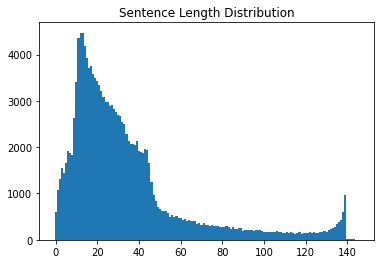

In [12]:
import numpy as np
import matplotlib.pyplot as plt
min_len = 999
max_len = 0
sum_len = 0
raw = ratings_train['document']

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

### 문장길이 140에서 하나의 피크를 찍는이유는 제한 길이때문이 아닐까요? 또 그런 것 치고는 넘는 것들이 있어 있상합니다.

In [13]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

아
잼
1
4
4
굿
짱
휴
.
1
굿
음
?
?
ㅎ
굿
ㅋ
굿
즐
♥
굳
ㅋ
네
ㅎ
ㅋ
굿
ㅇ
k
.
굿
굿
굳
ㅠ
?
1
ㅋ
굿
쒯
굿
굿
굳
♬
굿
토
ㅋ
ㅋ
굿
ㅋ
굿
O
똥
ㅎ
.
굿
ㅎ
짱
굳
굿
굿
짱
?
z
굿
짱
음
굳
ㅇ
헐
굳
굳
굿
굿
굿
삼
꽝
굿
굿
굿
굿
ㅎ
굳
굿
4
!
?
ㅎ
1
굳
.
ㅎ
풉
아
굿
똥
ㅅ
왜
ㄴ
굳
쉣
봐
z


In [15]:
check_sentence_with_length(raw, 146)


"스폰으로 먹고사는 방송이라 어쩔수 없다고 하지만. 이건 그냥 비현실적인 자동차만;...독일3사&슈퍼카 홍보 프로그램도 아니구.대중적인 자동차 방송으로 이루어 졌으면 합니다. 보는내내 ""카탈로그 책자""를 ""동영상으로 보여주는 방송"" 같아서 씁쓸하네요.!"
"""니 짓은 생각않고, 웬 복수!""의 교훈이라! 그럼 ""서바이벌 액션""으로 홍보하면 안되지! 초반 45분은 멋지게 열더니.. 억지 반전, 하드고어로 시간끌다가, 허둥지둥 화해로 끝내버리네. 90분 러닝타임에 엔딩자막만 11분 틀어주는 해괴망측한 영화~!"
"2007.02.25_ 벌교의 한 국밥집_ 점심: ""갸는 첫째고, 저 놈은 우리 둘째~"" 재문: ""아줌마! 미안해~ 그냥.. 아줌마! 나 그 남방 잘 어울려ㅠ_ㅠ?"" 대식에게 복수하려던 1주일 전_ 대식의 엄마를 먼저 만났다. 사랑의 꽃남방도..^-^o"


### 무튼 댓글 길이제한이 있는거 같아서 너무 긴 글은 없네요. 그래도 문장개수가 너무 많은게 있을까요?

In [8]:
temp_file = 'aiffel/sentiment_classification/ratings.temp'

ratings_train.drop_duplicates(inplace=True)
ratings_train = ratings_train.dropna(how='any')
with open(temp_file, 'w') as f:
    for sentence in ratings_train['document']:            # 이전 스텝에서 정제했던 corpus를 활용합니다.
        sentence = re.sub(r"[^0-9A-zㅏ-ㅣㄱ-ㅎ가-힣?!,.()\s'\"]","",sentence)
        f.write(str(sentence) + '\n')

target_train = ratings_train['label']
!head aiffel/sentiment_classification/ratings.temp

아 더빙.. 진짜 짜증나네요 목소리
흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
너무재밓었다그래서보는것을추천한다
교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다
막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.
원작의 긴장감을 제대로 살려내지못했다.
별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네
액션이 없는데도 재미 있는 몇안되는 영화
왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?


### 전처리 해서 받은 문장을 단어개수별로 보겠습니다... 라고 하려고 했는데, 저희는 어차피 형태소 단위로 볼거여서 지금 확정하기가 어렵군요ㅜㅜ
### 어쩔 수 없이 패딩을 넉넉하게 주어서 학습을 시켜보겠습니다.

In [9]:
testtemp_file = 'aiffel/sentiment_classification/testratings.temp'

ratings_test.drop_duplicates(inplace=True)
ratings_test = ratings_test.dropna(how='any')
with open(testtemp_file, 'w') as f:
    for sentence in ratings_test['document']:            # 이전 스텝에서 정제했던 corpus를 활용합니다.
        sentence = re.sub(r"[^0-9A-zㅏ-ㅣㄱ-ㅎ가-힣?!,.()\s'\"]","",sentence)
        f.write(str(sentence) + '\n')

target_test = ratings_test['label']
!head aiffel/sentiment_classification/testratings.temp

굳 ㅋ
GDNTOPCLASSINTHECLUB
뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
지루하지는 않은데 완전 막장임... 돈주고 보기에는....
3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??
음악이 주가 된, 최고의 음악영화
진정한 쓰레기
마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터가,고개를 젖게한다
갈수록 개판되가는 중국영화 유치하고 내용없음 폼잡다 끝남 말도안되는 무기에 유치한cg남무 아 그립다 동사서독같은 영화가 이건 3류아류작이다
이별의 아픔뒤에 찾아오는 새로운 인연의 기쁨 But, 모든 사람이 그렇지는 않네..


In [4]:
temp_file = 'aiffel/sentiment_classification/ratings.temp'
vocab_size = 20000 # 으로 했더니, 단어 너무 많다고 8아래로 해달라고 오류 뜸... 단어개수가 아니라, 최대 길이였나봐요.
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=aiffel/naver --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.
# 라고 써있었는데, 둘다 없다고 나옵니다.. 뭘까요???
!ls -l aiffel/naver*

-rw-r--r-- 1 root root 617188 Dec 14 02:01 aiffel/naver.model
-rw-r--r-- 1 root root 397544 Dec 14 02:01 aiffel/naver.vocab


In [5]:
vocab_size = 20000 # 으로 했더니, 단어 너무 많다고 8아래로 해달라고 오류 뜸... 단어개수가 아니라, 최대 길이였나봐요.
spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=aiffel/sentiment_classification/naver_bpe --vocab_size={} --model_type=bpe'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.
# 라고 써있었는데, 둘다 없다고 나옵니다.. 뭘까요???
!ls -l aiffel/sentiment_classification/naver_bpe*

-rw-r--r-- 1 root root 602543 Dec 14 02:02 aiffel/sentiment_classification/naver_bpe.model
-rw-r--r-- 1 root root 333758 Dec 14 02:02 aiffel/sentiment_classification/naver_bpe.vocab


In [6]:
s = spm.SentencePieceProcessor()
s.Load('aiffel/naver.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[6856, 450, 16, 10837, 206, 21, 3]
['▁아버지가', '방', '에', '들어가', '신', '다', '.']
아버지가방에들어가신다.


In [101]:
s = spm.SentencePieceProcessor()
s.Load('aiffel/sentiment_classification/naver_bpe.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[7316, 12695, 1405, 18407, 15219, 18399]
['▁아버지가', '방에', '들어', '가', '신다', '.']
아버지가방에들어가신다.


In [18]:
import tensorflow as tf
def tokenize(corpus, tensorlen):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post',maxlen=tensorlen)

    return tensor, tokenizer


In [19]:
temp_file = 'aiffel/sentiment_classification/ratings.temp'
token_seq = []
with open(temp_file,'r') as f:
    for i in f.readlines():
        token_seq.append(s.SampleEncodeAsPieces(i,1, 0.0))
senten_tensor, senten_tokenizer = tokenize(token_seq,100)
print(token_seq[0])

['▁아', '▁더빙', '..', '▁진짜', '▁짜증나네요', '▁목소리']


### 흠... 저는 형태소 100개면 하고 싶은 표현은 들었을거라고 생각하거든요.

In [25]:
print(f"bpe모델 단어개수: {len(senten_tokenizer.index_word)}")
senten_tensor[0]

bpe모델 단어개수: 20933


array([   46,  1110,     2,    15, 17003,  1889,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)

In [21]:
for i in range(20):
    print(senten_tokenizer.index_word[i+1])

.
..
...
▁영화
,
?
▁너무
!
▁정말
의
이
도
▁이
에
▁진짜
을
은
가
....
는


### 확실히 불용어 제거가 없으니 가장 많이 쓰이는 단어는 이렇군요.
### 이어서 komoran과 비교해보겠습니다.

In [23]:
komoran_seq, komoran = preprocessing(ratings_train, komoran)



In [24]:
komoran_tensor, komoran_tokenizer = tokenize(komoran_seq,100)
for i in range(20):
    print(komoran_tokenizer.index_word[i+1])

print("Komoran Vocab Size:", len(komoran_tokenizer.index_word))

.
이
하
ㄴ
는
다
영화
보
고
에
가
의
도
은
을
았
게
...
었
ㄹ
Komoran Vocab Size: 59099


In [26]:
print(f"bpe모델 단어개수: {len(senten_tokenizer.index_word)}")


bpe모델 단어개수: 20933


### !!!뭐가 더 좋다는 건가 했는데, 이렇게 차이가 많이 날까요?!??
### 단어 개수가 적어서 학습 효율도 훨씬 좋고, 능력도 좋을까요?? 너무 궁금합니다.

In [104]:
from tensorflow.keras import layers
vocab_size = 60000
embedding_size = 256

komoran_model = tf.keras.Sequential()
komoran_model.add(layers.Embedding(vocab_size,
                                   embedding_size,
                                   input_length=100,
                                   embeddings_initializer=tf.keras.initializers.RandomNormal()
))
komoran_model.add(layers.Conv1D(256,3, activation='relu', padding="same"))
komoran_model.add(layers.Conv1D(256,3, activation='relu', padding="same"))
komoran_model.add(layers.Conv1D(128,3, activation='relu', padding="same"))
komoran_model.add(layers.BatchNormalization())
komoran_model.add(layers.Conv1D(128,3, activation='relu', padding="same"))
komoran_model.add(layers.Conv1D(64,3, activation='relu', padding="same"))
komoran_model.add(layers.Conv1D(32,3, activation='relu', padding="same"))
komoran_model.add(layers.BatchNormalization())
komoran_model.add(layers.GlobalAveragePooling1D())
komoran_model.add(layers.Dense(10, activation='relu'))
komoran_model.add(layers.Dense(1, activation='sigmoid'))

komoran_model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 100, 256)          15360000  
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 100, 256)          196864    
_________________________________________________________________
conv1d_67 (Conv1D)           (None, 100, 256)          196864    
_________________________________________________________________
conv1d_68 (Conv1D)           (None, 100, 128)          98432     
_________________________________________________________________
batch_normalization_19 (Batc (None, 100, 128)          512       
_________________________________________________________________
conv1d_69 (Conv1D)           (None, 100, 128)          49280     
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 100, 64)         

In [105]:
bpe_vocab_size = 30000

bpe_model = tf.keras.Sequential()
bpe_model.add(layers.Embedding(bpe_vocab_size,
                               embedding_size,
                               input_length=100,
                               embeddings_initializer=tf.keras.initializers.RandomNormal()
))   
bpe_model.add(layers.Conv1D(256,3, activation='relu', padding="same"))
bpe_model.add(layers.Conv1D(256,3, activation='relu', padding="same"))
bpe_model.add(layers.Conv1D(128,3, activation='relu', padding="same"))
bpe_model.add(layers.BatchNormalization())
bpe_model.add(layers.Conv1D(128,3, activation='relu', padding="same"))
bpe_model.add(layers.Conv1D(64,3, activation='relu', padding="same"))
bpe_model.add(layers.Conv1D(32,3, activation='relu', padding="same"))
bpe_model.add(layers.BatchNormalization())
bpe_model.add(layers.GlobalAveragePooling1D())
bpe_model.add(layers.Dense(10, activation='relu'))
bpe_model.add(layers.Dense(1, activation='sigmoid'))

bpe_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 100, 256)          7680000   
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 100, 256)          196864    
_________________________________________________________________
conv1d_73 (Conv1D)           (None, 100, 256)          196864    
_________________________________________________________________
conv1d_74 (Conv1D)           (None, 100, 128)          98432     
_________________________________________________________________
batch_normalization_21 (Batc (None, 100, 128)          512       
_________________________________________________________________
conv1d_75 (Conv1D)           (None, 100, 128)          49280     
_________________________________________________________________
conv1d_76 (Conv1D)           (None, 100, 64)         

In [71]:
batch_size = 128
print(komoran_tensor.shape)
target_train = tf.constant(np.array(target_train).T)
print(target_train.shape)
BUFFER_SIZE = len(komoran_tensor)
komoran_train = tf.data.Dataset.from_tensor_slices((komoran_tensor, target_train))

komoran_train.batch(batch_size)

(149995, 100)
(149995, 1)


<BatchDataset shapes: ((None, 100), (None, 1)), types: (tf.int32, tf.int64)>

In [62]:
bpe_train = tf.data.Dataset.from_tensor_slices({'x_train': senten_tensor, 'y_train': target_train})
bpe_train.batch(batch_size)

<BatchDataset shapes: {x_train: (None, 100), y_train: (None, 1)}, types: {x_train: tf.int32, y_train: tf.int64}>

In [81]:
komoran_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy']
)

history = komoran_model.fit(komoran_tensor,
                            target_train,
                            epochs=10,
                            batch_size=128

)
# what = komoran_train.__iter__()

Epoch 1/10
1172/1172 [==============================] - 119s 84ms/step - loss: 0.3505 - accuracy: 0.8441
Epoch 2/10
1172/1172 [==============================] - 81s 69ms/step - loss: 0.2371 - accuracy: 0.9067
Epoch 3/10
1172/1172 [==============================] - 80s 68ms/step - loss: 0.1593 - accuracy: 0.9401
Epoch 4/10
1172/1172 [==============================] - 79s 67ms/step - loss: 0.1084 - accuracy: 0.9614
Epoch 5/10
1172/1172 [==============================] - 79s 67ms/step - loss: 0.0782 - accuracy: 0.9727
Epoch 6/10
1172/1172 [==============================] - 79s 67ms/step - loss: 0.0619 - accuracy: 0.9790
Epoch 7/10
1172/1172 [==============================] - 78s 67ms/step - loss: 0.0519 - accuracy: 0.9821
Epoch 8/10
1172/1172 [==============================] - 78s 67ms/step - loss: 0.0457 - accuracy: 0.9849
Epoch 9/10
1172/1172 [==============================] - 80s 68ms/step - loss: 0.0421 - accuracy: 0.9858
Epoch 10/10
1172/1172 [==============================] - 79s 68

In [83]:
bpe_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy']
)

history = bpe_model.fit(senten_tensor,
                        target_train,
                        epochs=10,
                        batch_size=256

)

Epoch 1/10
586/586 [==============================] - 89s 118ms/step - loss: 0.4644 - accuracy: 0.7634
Epoch 2/10
586/586 [==============================] - 51s 87ms/step - loss: 0.2484 - accuracy: 0.8980
Epoch 3/10
586/586 [==============================] - 51s 87ms/step - loss: 0.1844 - accuracy: 0.9273
Epoch 4/10
586/586 [==============================] - 51s 87ms/step - loss: 0.1235 - accuracy: 0.9525
Epoch 5/10
586/586 [==============================] - 51s 87ms/step - loss: 0.0726 - accuracy: 0.9743
Epoch 6/10
586/586 [==============================] - 51s 88ms/step - loss: 0.0426 - accuracy: 0.9858
Epoch 7/10
586/586 [==============================] - 51s 87ms/step - loss: 0.0299 - accuracy: 0.9900
Epoch 8/10
586/586 [==============================] - 51s 87ms/step - loss: 0.0232 - accuracy: 0.9924
Epoch 9/10
586/586 [==============================] - 52s 88ms/step - loss: 0.0210 - accuracy: 0.9924
Epoch 10/10
586/586 [==============================] - 51s 88ms/step - loss: 0.01

In [84]:
def gen_tensor(corpus, tokenizer, tensorlen):  # corpus: Tokenized Sentence's List

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post',maxlen=tensorlen)

    return tensor

In [92]:
def preprocessing(data_df,tokenizer):
    data_df.drop_duplicates(inplace=True)
    data_df = data_df.dropna(how='any')
    
    token_seq = []
    for sentence in data_df['document']:
        sentence = re.sub(r"[^0-9A-zㅏ-ㅣㄱ-ㅎ가-힣?!,.()\s'\"]","",sentence)
        try:
            sentence = tokenizer.morphs(sentence)
            token_seq.append(sentence)
        except:
            token_seq.append(['하..'])
    return token_seq, tokenizer
           

In [93]:
komoran_test_seq, _ = preprocessing(ratings_test, komoran)
komoran_test_tensor = gen_tensor(komoran_test_seq, komoran_tokenizer, 100)
target_tst = tf.constant(np.array(target_test).T)

komoran_results = komoran_model.evaluate(komoran_test_tensor,target_tst, verbose=2)

print(komoran_results)

1563/1563 - 10s - loss: 1.0517 - accuracy: 0.8075
[1.051745891571045, 0.8074684739112854]


In [86]:

temp_file = 'aiffel/sentiment_classification/testratings.temp'
token_seq = []
with open(temp_file,'r') as f:
    for i in f.readlines():
        token_seq.append(s.SampleEncodeAsPieces(i,1, 0.0))
bpe_test_tensor, _ = tokenize(token_seq,100)
print(token_seq[0])

target_tst = tf.constant(np.array(target_test).T)

bpe_results = bpe_model.evaluate(bpe_test_tensor,target_tst, verbose=2)

['▁굳', '▁ᄏ']
1563/1563 - 16s - loss: 3.6413 - accuracy: 0.5137


In [106]:
komoran_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy']
)

history = komoran_model.fit(komoran_tensor,
                            target_train,
                            epochs=3,
                            batch_size=256

)

Epoch 1/3
586/586 [==============================] - 113s 190ms/step - loss: 0.4647 - accuracy: 0.7706
Epoch 2/3
586/586 [==============================] - 110s 188ms/step - loss: 0.2435 - accuracy: 0.9043
Epoch 3/3
586/586 [==============================] - 111s 189ms/step - loss: 0.1554 - accuracy: 0.9434


In [107]:
komoran_results = komoran_model.evaluate(komoran_test_tensor,target_tst, verbose=2)

print(komoran_results)

1563/1563 - 9s - loss: 0.3524 - accuracy: 0.8588
[0.3524326682090759, 0.858831524848938]


In [112]:
bpe_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy']
)

history = bpe_model.fit(senten_tensor,
                        target_train,
                        epochs=2,
                        batch_size=256

)

Epoch 1/2
586/586 [==============================] - 75s 124ms/step - loss: 0.1005 - accuracy: 0.9637
Epoch 2/2
586/586 [==============================] - 72s 124ms/step - loss: 0.0530 - accuracy: 0.9827


In [ ]:
temp_file = 'aiffel/sentiment_classification/testratings.temp'
token_seq = []
with open(temp_file,'r') as f:
    for i in f.readlines():
        token_seq.append(s.SampleEncodeAsPieces(i,1, 0.0))
bpe_test_tensor = gen_tensor(token_seq, senten_tokenizer, 100)
print(token_seq[0])

bpe_results = bpe_model.evaluate(bpe_test_tensor,target_tst, verbose=2)
print(bpe_results)

['▁굳', '▁ᄏ']
1563/1563 - 9s - loss: 0.4027 - accuracy: 0.8549
[0.4026740491390228, 0.8548513054847717]


## 뭐 안했는데, 85%씩은 그냥 넘네요ㅎㅎ 뿌듯합니다!